In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [7]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [8]:
left = df[df.left==1]
left.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [9]:
retained = df[df.left==0]
retained.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low


In [10]:
print("left:")
print(left.shape)
#print("\n")
print("Retained:")
print(retained.shape)
#print("\n")
print("Total:")
print(df.shape)

left:
(3571, 10)
Retained:
(11428, 10)
Total:
(14999, 10)


In [11]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


pd.crosstab(df.salary, df.left)

In [12]:
pd.crosstab(df.salary, df.left).plot(kind='bar')

In [13]:
pd.crosstab(df.Department, df.left)

left,0,1
Department,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


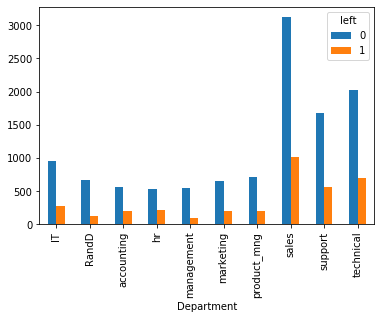

In [14]:
pd.crosstab(df.Department, df.left).plot(kind='bar')


**From the data analysis so far we can conclude that we will use following variables as independant variables in our model**


1.Satisfaction Level

2.Average Monthly Hours

3.Promotion Last 5 Years

4.Salary

In [15]:

new_df = df[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'salary']]
new_df.head()


,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


**Handle Dummy Data in salary column:**

In [16]:
dummies = pd.get_dummies(new_df.salary, prefix='salary')
dummies.head()

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [17]:
main_dummies = pd.concat([new_df, dummies], axis='columns')
main_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [18]:
main_dummies.drop('salary', axis='columns', inplace=True)
main_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [19]:

 x= main_dummies
x.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [20]:
y = df.left
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

**Train and Test data split**

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5)

In [22]:
x_test.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
2995,0.50,192,0,0,0,1
9300,0.91,166,0,0,0,1
6943,0.88,249,0,0,0,1
10487,0.56,198,0,0,1,0
7196,0.51,133,0,0,1,0


In [23]:
model = linear_model.LogisticRegression(solver='lbfgs',multi_class = 'auto', max_iter=10000)
model.fit(x_train, y_train)

C:\Users\nazmu.DESKTOP-BJH91JT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [25]:
model.score(x_test, y_test)

0.7778666666666667

In [26]:
model.score(x_test, y_test)


0.7778666666666667